File is accessible


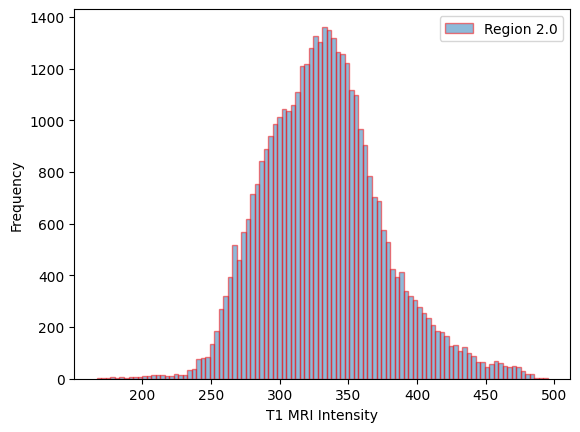

In [6]:
# Testing code for just 1 t1 image

import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
 
# Specify the paths to the T1, T1CE, T2, FLAIR, … MRI and segmented image files
t1_file_path = '/Users/yehudadicker/Downloads/Data_far_near/Baseline/AAAC_2008.03.30_t1_LPS_rSRI_SSFinal_N3_sus.nii'
segmented_file_path = '/Users/yehudadicker/Downloads/Data_far_near/Seg/AAAC_2008.03.30_LPS_rSRI_segmF.nii'
 
if os.access(t1_file_path, os.R_OK):
    print("File is accessible")
else:
    print("File is not accessible")

# Load the T1 MRI and segmented image files
t1_img = nib.load(t1_file_path)
segmented_img = nib.load(segmented_file_path)
 
# Get the data arrays from the loaded images
t1_data = t1_img.get_fdata()
segmented_data = segmented_img.get_fdata()
 
# Get the unique labels/regions present in the segmented image
unique_labels = np.unique(segmented_data)
 
# Iterate over each unique label/region
for label in unique_labels:
    if label != 2:
        continue
    # Extract the T1 MRI values within the current label/region
    edema_t1_values = t1_data[segmented_data == label]
 
    # Plot the histogram of T1 MRI within the current region
    plt.hist(edema_t1_values, bins=100, alpha=0.5, label=f'Region {label}', edgecolor='red')
 
# Add labels and legend to the histogram plot
plt.xlabel('T1 MRI Intensity')
plt.ylabel('Frequency')
plt.legend()
 
# Show the histogram plot
plt.show()